## CS102 - Further Computing

Mark Howard<br>
School of Mathematical & Statistical Sciences<br>
NUI Galway<br>
mark.howard@nuigalway.ie


### 1. Aspects of Scientific Computing

# Week 2: Understanding `python` Data Types
Here, we review `python`'s basic data types, and some
of their properties.

## Dynamic Typing
* A statically-typed language like `C` or `Java` requires each 
  variable to be explicitly declared, together with a type.

* In a dynamically-typed language like `python` this kind of
  specification is not needed, a variable is implicitly declared
  when it is first used.

## Dynamic Typing
* For example, in `C` one might specify a particular operation as follows:

```C
/* C code */
int result = 0;
for (int i = 0; i < 100; i++) {
    result += i;
}
```
* In `python` the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i
```
* In `C`, the data type of each variable (`int` for integer) is
  explicitly declared (and thus known to the compiler).
* In `python`, the data type is **dynamically** inferred
  (at runtime) from the **value** of the variable.

* In `python`, one can write and execute the following:

In [ ]:
value = 0.0
print(value == 0)
value = "0"
print(value == 0)

* The corresponding `C` code  would fail to compile.

* The standard `python` interpreters (and `ipython` too)
are implemented in `C`.
* Thus, at runtime, every `python` object is also a `C` object.
* However, there is a big difference between a `C` variable
  storing a `C` integer as value, and a `python` variable
  holding a `python` integer ...

* A `C` integer variable is essentially a label for a **slot** in 
  machine memory whose bytes encode an integer value.
* A `python` variable is a **pointer** to a complex structure in 
  memory, which contains administrative information about a
  `python` object (such as its **type**) in addition to the 
  integer value.

* The integer (long) type definition effectively looks like this:

```C
/* C code */
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3 thus actually contains four pieces:

* `ob_refcnt`, a **reference** count that helps Python silently handle memory allocation and deallocation
* `ob_type`, which encodes the **type** of the object
* `ob_size`, which specifies the **size** of the object (i.e., its number of digits)
* `ob_digit`, the array of digits representing an actual integer value.

![](images/cint_vs_pyint.png)

* The function `sys.getsizeof` reveals that in `python`, there is 
  an administrative overhead of $24$ bytes for each integer, whose
  value only requires $4$ bytes (if it is small) ...

In [ ]:
from sys import getsizeof
print(getsizeof(0))
print(getsizeof(100))
print(getsizeof(2**30-1))
print(getsizeof(2**30))

* This memory overhead becomes even more drastic when it comes to 
  **lists** of integers.

## Lists in `python`
* Dynamic typing allows lists in `python` to be heterogeneous.

In [ ]:
L = [True, 2, 3.0, "4"]
[(x, type(x)) for x in L]

* This flexibility comes at a price: each object in the list
  stores their own administrative information.

In [ ]:
getsizeof(L)

In [ ]:
[(x, getsizeof(x)) for x in L]

* If all the objects in a list are of the same type, most of
  this information is redundant.
* It would be more efficient to store these data in a
  fixed-type array

In [ ]:
#The contents plus the list object
P = [2, 3, 5, 7, 11, 13, 17, 19]
sum(getsizeof(x) for x in P) + getsizeof(P)

## `NumPy` Arrays
* The `numpy` package provides efficient storage and
  efficient operations on array based data.
  
  ![](images/cint_vs_pyint.png)

* At the implementation level, the `numpy` array essentially contains a single pointer to one contiguous block of data. 
* The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer (above) that we saw earlier

![](images/array_vs_list.png)

## `NumPy` Arrays

In [ ]:
import numpy as np

* A `numpy` fixed-type array can be constructed from a `python` list.

In [ ]:
a = np.array([3,1,4,1,5,9,2,6])
a

In [ ]:
np.array(range(10))

* If necessary (and possible) `numpy` will **upcast** to
  make all values in the array have the same type
  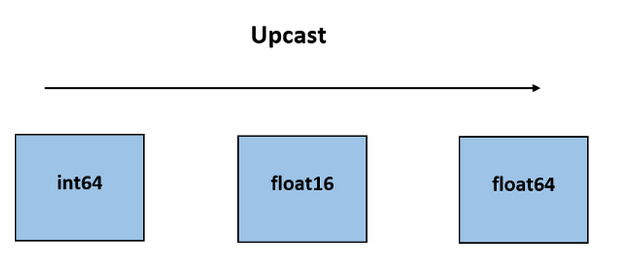

In [ ]:
np.array([3.14, 1, 5, 9, 2, 6])

* Arrays can be multidimensional

In [ ]:
np.array([range(i, i+4) for i in [2,5,7]])

* There are many ways to create arrays from scratch, using
  `numpy`'s builtin routines.

In [ ]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

In [ ]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

In [ ]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 21, 2)

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

* There are many ways to create arrays from scratch, using
  `numpy`'s builtin routines.

In [ ]:
# Create a 3x4 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 4))

In [ ]:
# Create a 3x4 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 4))

In [ ]:
# Create a 2x5 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (2, 5))

In [ ]:
# Create a 3x3 identity matrix
np.eye(3, dtype=int)

`numpy` arrays are stored in contiguous blocks of memory. If you want to **add rows or columns to an existing array, the entire array needs to be copied to a new block of memory**, creating gaps for the new elements to be stored. This is **very inefficient if done repeatedly to build an array.**

In the case of adding rows, your best bet is to create an array that is as big as your data set will eventually be, and then assign data to it row-by-row:

In [ ]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

**Warning:** two arrays may share the same memory. This means you have to be sure that when you modify one object, you aren't inadvertently modifying another.

In [ ]:
x = np.array([1, 2, 3, 4])
y = x
print(y)

In [ ]:
x[0] = 9
print(y)

There are ways of checking for and preventing these kinds of mistakes

## `NumPy` Standard Data Types

`NumPy` arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because `NumPy` is built in `C`, the types will be familiar to users of `C`, `Fortran`, and other related languages.

The standard `NumPy` data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

## References

### `python`

* **list comprehension** [[doc]](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) allows the construction of new list from old ones
without explicit `for` loops (or `if` statements).

In [ ]:
# squares of odd numbers for x in {0,1,...,9}
[x**2 for x in range(10) if x % 2 == 1]

* `sum`: [[doc]](https://docs.python.org/3/library/functions.html#sum) computes the sum of a list

* `str`: [[doc]](https://docs.python.org/3/library/stdtypes.html#str) converts an object to a string.

### `sys`

* `getsizeof`: [[doc]](https://docs.python.org/2/library/sys.html#sys.getsizeof)
determines the size (in bytes) of an object

### `numpy`

* `np.array`: [[doc]](https://numpy.org/doc/stable/user/basics.creation.html)
  constructs a `numpy` multidimensional array.

* `dtype`: [[doc]](https://numpy.org/doc/stable/reference/arrays.dtypes.html)
  the common type of the entries of a `numpy` array.

* `np.zeros`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) fills an array with $0$ values of the specified type

* `np.ones`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) fills an array with $1$ values

* `np.full`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.full.html) fills an array with the given value

* `np.eye`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) creates the identity matrix of the given shape

* `np.empty`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) creates an array w/o setting the values

### `numpy`

* `np.arange`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) constructs a range as `numpy` array.

* `np.linspace`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) constructs an array of equally spaced values.

###  `numpy.random`

* `random`: [[doc]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html) fills an array with random numbers between $0$ and $1$.

* `normal`: [[doc]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) draws random values from a normal distribution.

* `randint`: [[doc]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) fills an array with random integers.

* (Note: this subpackage has been updated and future versions should access the random number generators in a different way ...)

# `numpy` arrays: Attributes, Indexing, Reshaping

* `numpy` arrays improve on `python` lists in many ways.
* `numpy` arrays are **homogeneous** **multi-dimensional** collections of data.
* As such, a `numpy` array has:
    * a **shape**, specifying its size in each dimension;
    * a common **data type** for all its elements.
* These (and related) **attributes** of an array can be directly accessed.
* Basic manipulation of the data in an array involves **indexing** to access single elements
  and **slicing** to access subarrays.
* `numpy` extends `python`s set of indexing and slicing operators.
* The **shape** of a `numpy` array can be **modified**, without affecting the data it contains.
* Multiple arrays can be **combined** into one.
* Conversely, and array can be **split** into multiple parts.  

* a `numpy` array is a **multi-dimensional** **homogeneous** collection of data.
* in **mathematics** and **physics**, such an object is often called a **tensor**.
* a `numpy` array has a **shape** and a **dtype**.
* let's investigate these in some simple examples.
* start with three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
* `np.random.randint` constructs such random arrays of integers in a given range.

In [ ]:
x0 = np.random.randint(10) # A single random integer
x0

In [ ]:
x1 = np.random.randint(10, size=4)  # One-dimensional array; size means shape
x1

In [ ]:
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array: shape 3 x 4
x2

In [ ]:
x3 = np.random.randint(10, size=(2, 3, 4))  # Three-dimensional: shape 2 x 3 x 4
x3

In [ ]:
print(x3)

Each array has the attributes 
* `dtype`: the **data type** of the array.
* `shape`: the **size in each dimension**, and

In [ ]:
print("x2 dtype:", x2.dtype)
print("x2 shape:", x2.shape)

In [ ]:
print("x3 dtype:", x3.dtype)
print("x3 shape:", x3.shape)

Further attributes of interest are
* `ndim`: the **number of dimensions**, and
* `size`: the **total number** of elements.

In [ ]:
print("x3 ndim: ", x3.ndim)
print("x3 size: ", x3.size)

Obviously, `size` is the product of the numbers in the list `shape`, and `ndim` is the length of that list.

In [ ]:
len(x3.shape) == x3.ndim

In [ ]:
# from math import prod (available from python 3.8)
x3.size == np.prod(x3.shape)

##  Exercises


1.  Construct a `numpy` $3 \times 3 \times 3$ array of $1$s (of type `int`).

2. Construct a `numpy` $3 \times 4 \times 5$ array of random integers
   in the range $1$ to $99$ (inclusive).
   
3. Create an array of $21$ values, evenly spaced between $0$ and $100$.

4. Create an array with a sequence of integers,
   starting at $1950$, ending at $2015$, stepping by $5$.
   
5. Create a list of all odd squares between $0$ and $10000$.

6. Make a few `numpy` arrays, with random entries or ranges of integers, of varying dimensions.

7. Determine the basic attributes of these arrays.

In [ ]:
A=np.ones((3,3,3), dtype=np.int_)
print(A)
print('A.dtype:',A.dtype)
print('A.shape:',A.shape)

In [ ]:
B=np.random.randint(1, 100, (3, 4,5))
print(B)
print('B.dtype:',B.dtype)
print('B.shape:',B.shape)

In [ ]:
C=np.linspace(1, 100, 21)
print(C)
print('C.dtype:',C.dtype)
print('C.shape:',C.shape)

In [ ]:
D=np.arange(1950, 2016, 5)
print(D)
print('D.dtype:',D.dtype)
print('D.shape:',D.shape)

In [ ]:
[x**2 for x in range(100) if x%2==1]